<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-librairies-utiles" data-toc-modified-id="Importation-des-librairies-utiles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des librairies utiles</a></span></li><li><span><a href="#Obtention-des-données" data-toc-modified-id="Obtention-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtention des données</a></span></li><li><span><a href="#Exploration-de-la-Donnée" data-toc-modified-id="Exploration-de-la-Donnée-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploration de la Donnée</a></span><ul class="toc-item"><li><span><a href="#Identifier-les-features-et-le-Label" data-toc-modified-id="Identifier-les-features-et-le-Label-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Identifier les features et le Label</a></span></li><li><span><a href="#Etude-des-valeurs-dupliquées" data-toc-modified-id="Etude-des-valeurs-dupliquées-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Etude des valeurs dupliquées</a></span></li><li><span><a href="#Etude-basique-de-valeurs-aberrantes" data-toc-modified-id="Etude-basique-de-valeurs-aberrantes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Etude basique de valeurs aberrantes</a></span></li><li><span><a href="#Etude-des-valeurs-manquantes" data-toc-modified-id="Etude-des-valeurs-manquantes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Etude des valeurs manquantes</a></span></li><li><span><a href="#Distribution-des-données" data-toc-modified-id="Distribution-des-données-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Distribution des données</a></span></li><li><span><a href="#Matrice-de-correlations" data-toc-modified-id="Matrice-de-correlations-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Matrice de correlations</a></span></li><li><span><a href="#Résumé-de-la-partie-exploratoire---transformations-pertinentes?" data-toc-modified-id="Résumé-de-la-partie-exploratoire---transformations-pertinentes?-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Résumé de la partie exploratoire - transformations pertinentes?</a></span></li></ul></li><li><span><a href="#Préparation-des-données" data-toc-modified-id="Préparation-des-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Préparation des données</a></span><ul class="toc-item"><li><span><a href="#Gestion-des-données-manquantes" data-toc-modified-id="Gestion-des-données-manquantes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gestion des données manquantes</a></span></li><li><span><a href="#Correction-ou-suppression-de-valeurs-aberrantes" data-toc-modified-id="Correction-ou-suppression-de-valeurs-aberrantes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Correction ou suppression de valeurs aberrantes</a></span></li><li><span><a href="#Sélection-de-feature" data-toc-modified-id="Sélection-de-feature-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sélection de feature</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Feature-Scaling-and/or-Normalization" data-toc-modified-id="Feature-Scaling-and/or-Normalization-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span><a href="https://colab.research.google.com/github/ml-course/master/blob/master/notebooks/06%20-%20Data%20Preprocessing.ipynb" rel="nofollow" target="_blank">Feature Scaling and/or Normalization</a></a></span></li><li><span><a href="#Encoder-les-variables-catégorielles" data-toc-modified-id="Encoder-les-variables-catégorielles-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Encoder les variables catégorielles</a></span></li><li><span><a href="#Créer-un-pipeline" data-toc-modified-id="Créer-un-pipeline-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Créer un pipeline</a></span></li></ul></li></ul></div>

<img src="https://miro.medium.com/v2/resize:fit:1400/0*-G8VWk7x24EcOyza" alt="image" width="100%">

L'objectif de ce Lab est de préparer les données permettant de prédire les prix de l'immobilier en Californie en 1990.

Les données concernent les maisons trouvées dans un district californien donné et quelques statistiques récapitulatives à leur sujet basées sur les données du recensement de 1990. Soyez averti que les données ne sont pas nettoyées, certaines étapes de prétraitement sont donc requises ! Les colonnes sont les suivantes, leurs noms sont assez explicites :

longitude

latitude

logement_âge médian_

total_chambres

total_chambres

population

ménages

revenu_médian

valeur médiane_de la maison

océan_proximité

Le prétraitement comprend la détection et la gestion des valeurs manquantes, l'enodage des caractéristiques catégorielles et ne se limite pas à ces étapes.

## Importation des librairies utiles

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install missingno

In [3]:
# import des librairies
import os, random

import numpy as np # manipulation de matrices
import pandas as pd # chargement de donnees

#visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

# visualition de valeurs manquantes
import missingno as msno

# gestion des valeurs manquantes
from sklearn.impute import SimpleImputer

# encodage des variables categorielles
from sklearn.preprocessing import OneHotEncoder  

# mise a l'echelle des variables numeriques
from sklearn.preprocessing import StandardScaler  

# separation de la donnee en train, validation, et test
from sklearn.model_selection import train_test_split

# création de pipeline
from sklearn.pipeline import Pipeline


In [4]:
# ne modifier pas ce bout de code
seed = 2024
random.seed(seed)
np.random.seed(seed)

## Obtention des données

La donnée nécessaire pour ce Lab se trouve dans le dossier data/housing.csv.

In [5]:
# charger la donée  
housing_df = pd.read_csv('data/housing.csv')

In [6]:
# afficher les 5 premières lignes
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# vérifier la taille de la donnée
housing_df.shape

(20640, 10)

In [8]:
# vérifier le type de donnée (série temporelle, échantillon, géographique, ...)
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Le data dredging (également connu sous le nom de data snooping ou p-hacking) est l'utilisation abusive de l'analyse de données pour trouver des modèles dans les données qui peuvent être présentés comme statistiquement significatifs, augmentant ainsi considérablement le risque de faux positifs et le sous-estimant.

In [9]:
# mettez un échantillon de 20% de la donnée de côté que vous ne regarderez jamais 
# en utilisant train_test_split. Utiliser random_state = 67
housing_train_df, housing_test_df = train_test_split(housing_df, test_size=0.2, random_state=67)

# sauvegarder les ensembles crees a l'aide de pd.to_csv dans le dossier data
# sous les noms housing_train.csv et housing_test.csv
housing_train_df.to_csv('data/housing_train.csv')
housing_test_df.to_csv('data/housing_test.csv')

Pour les analyses subséquentes, veillez à ne travailler qu'avec la donnée d'entraînement.

## Exploration de la Donnée

### Identifier les features et le Label

- Combien de features/ caractéristiques sont présentes dans le jeu de données?
- Quels sont leurs types?
- Le Label est-il continu ou catégoriel?

In [10]:
# Nombre de features
print(f"Nombre de features : {housing_df.shape[1] - 1}")

Nombre de features : 9


In [11]:
# Le type de chaque feature
print(f"Type de chaque feature : \n{housing_df.drop('median_house_value', axis=1).dtypes}")

Type de chaque feature : 
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object


In [12]:
label_type = housing_df['median_house_value'].dtype

if(label_type in ['object','category']) :
    print("Le label est catégoriel")
else:
    print(f"Le label est continu et plus précisément de type {label_type}")

Le label est continu et plus précisément de type float64


### Etude des valeurs dupliquées

In [13]:
housing_df[housing_df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [14]:
housing_df.duplicated().sum()

0

### Etude basique de valeurs aberrantes

In [25]:
## description du jeu de données et interpretation
# comparaison des valeurs extrêmes au valeurs centrales
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Etude des valeurs manquantes

In [16]:
# visualiser les valeurs manquantes de quatre façons différentes
# et interpréter chaque visualisation
# simple tableau

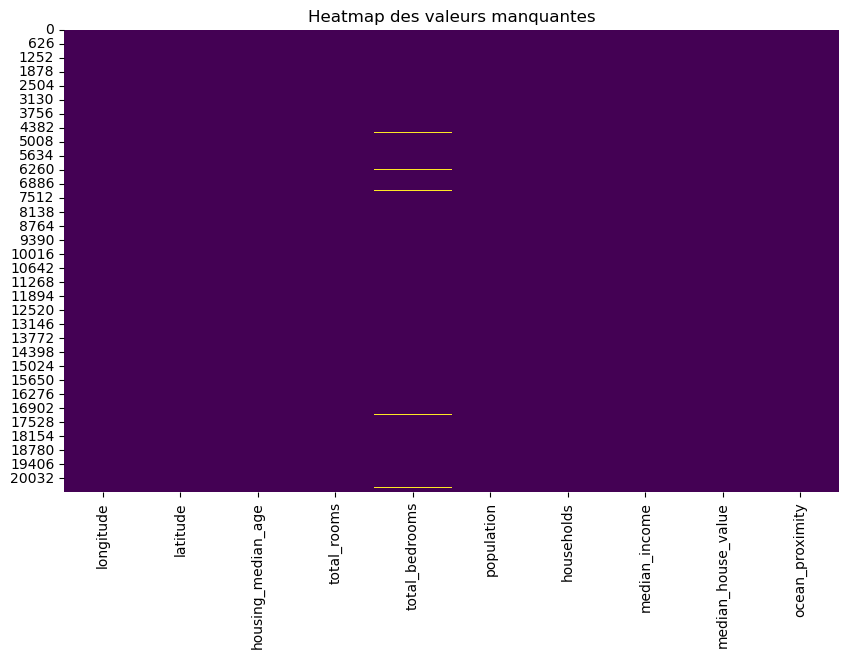

In [26]:
# 1. Heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(housing_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()

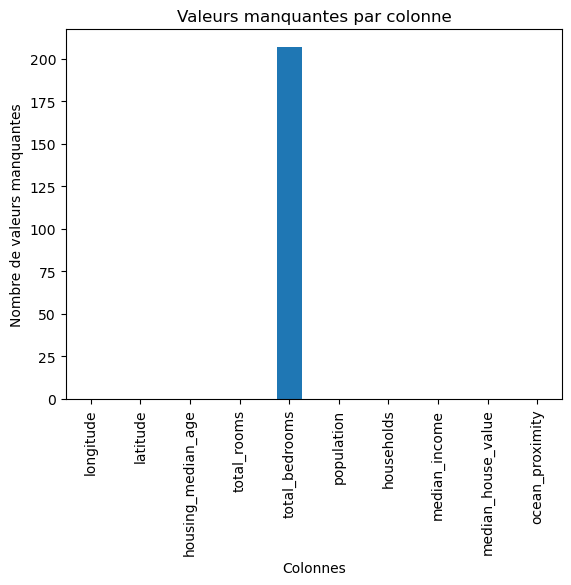

In [29]:
# 2. Bar plot des valeurs manquantes par colonne
missing_values_count = housing_df.isnull().sum()
missing_values_count.plot.bar()
plt.title('Valeurs manquantes par colonne')
plt.ylabel('Nombre de valeurs manquantes')
plt.xlabel('Colonnes')
plt.show()

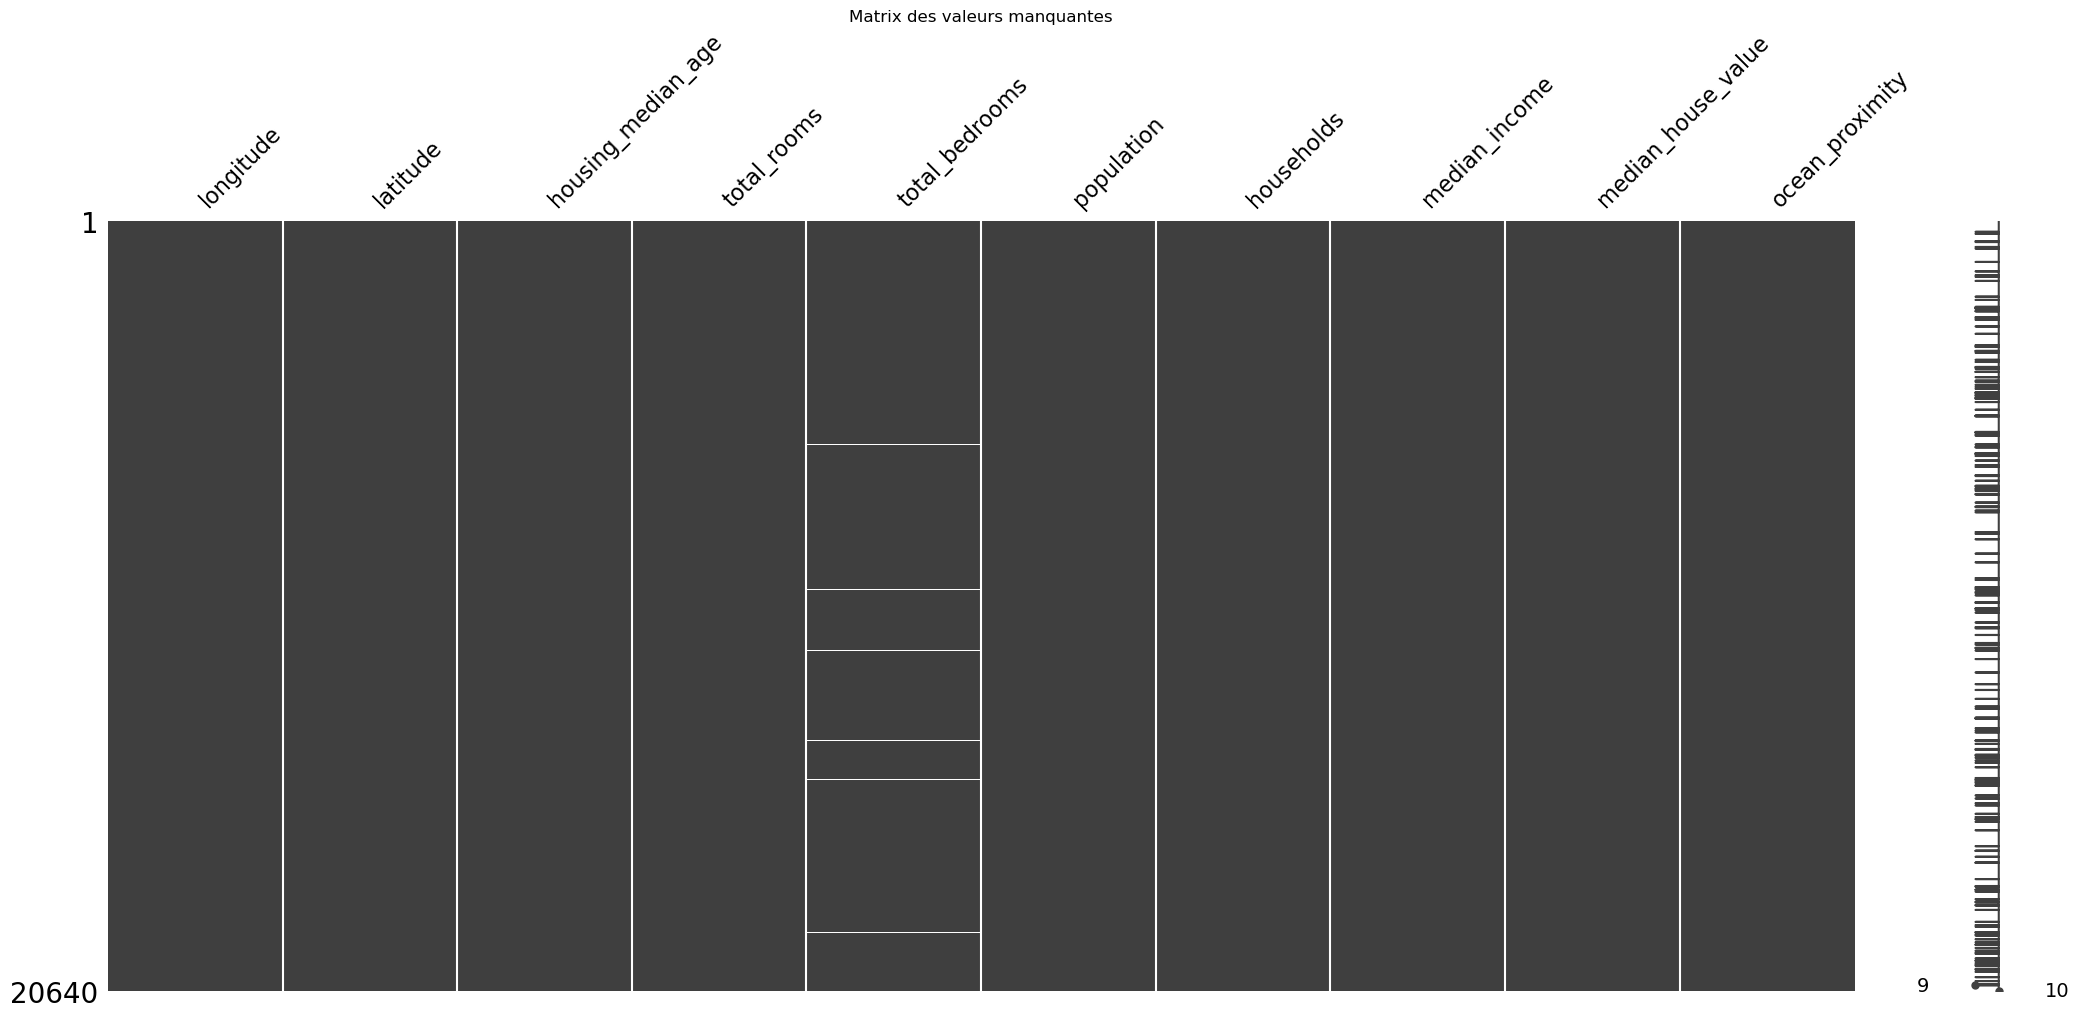

In [30]:
# 3. Matrix des valeurs manquantes
msno.matrix(housing_df)
plt.title('Matrix des valeurs manquantes')
plt.show()

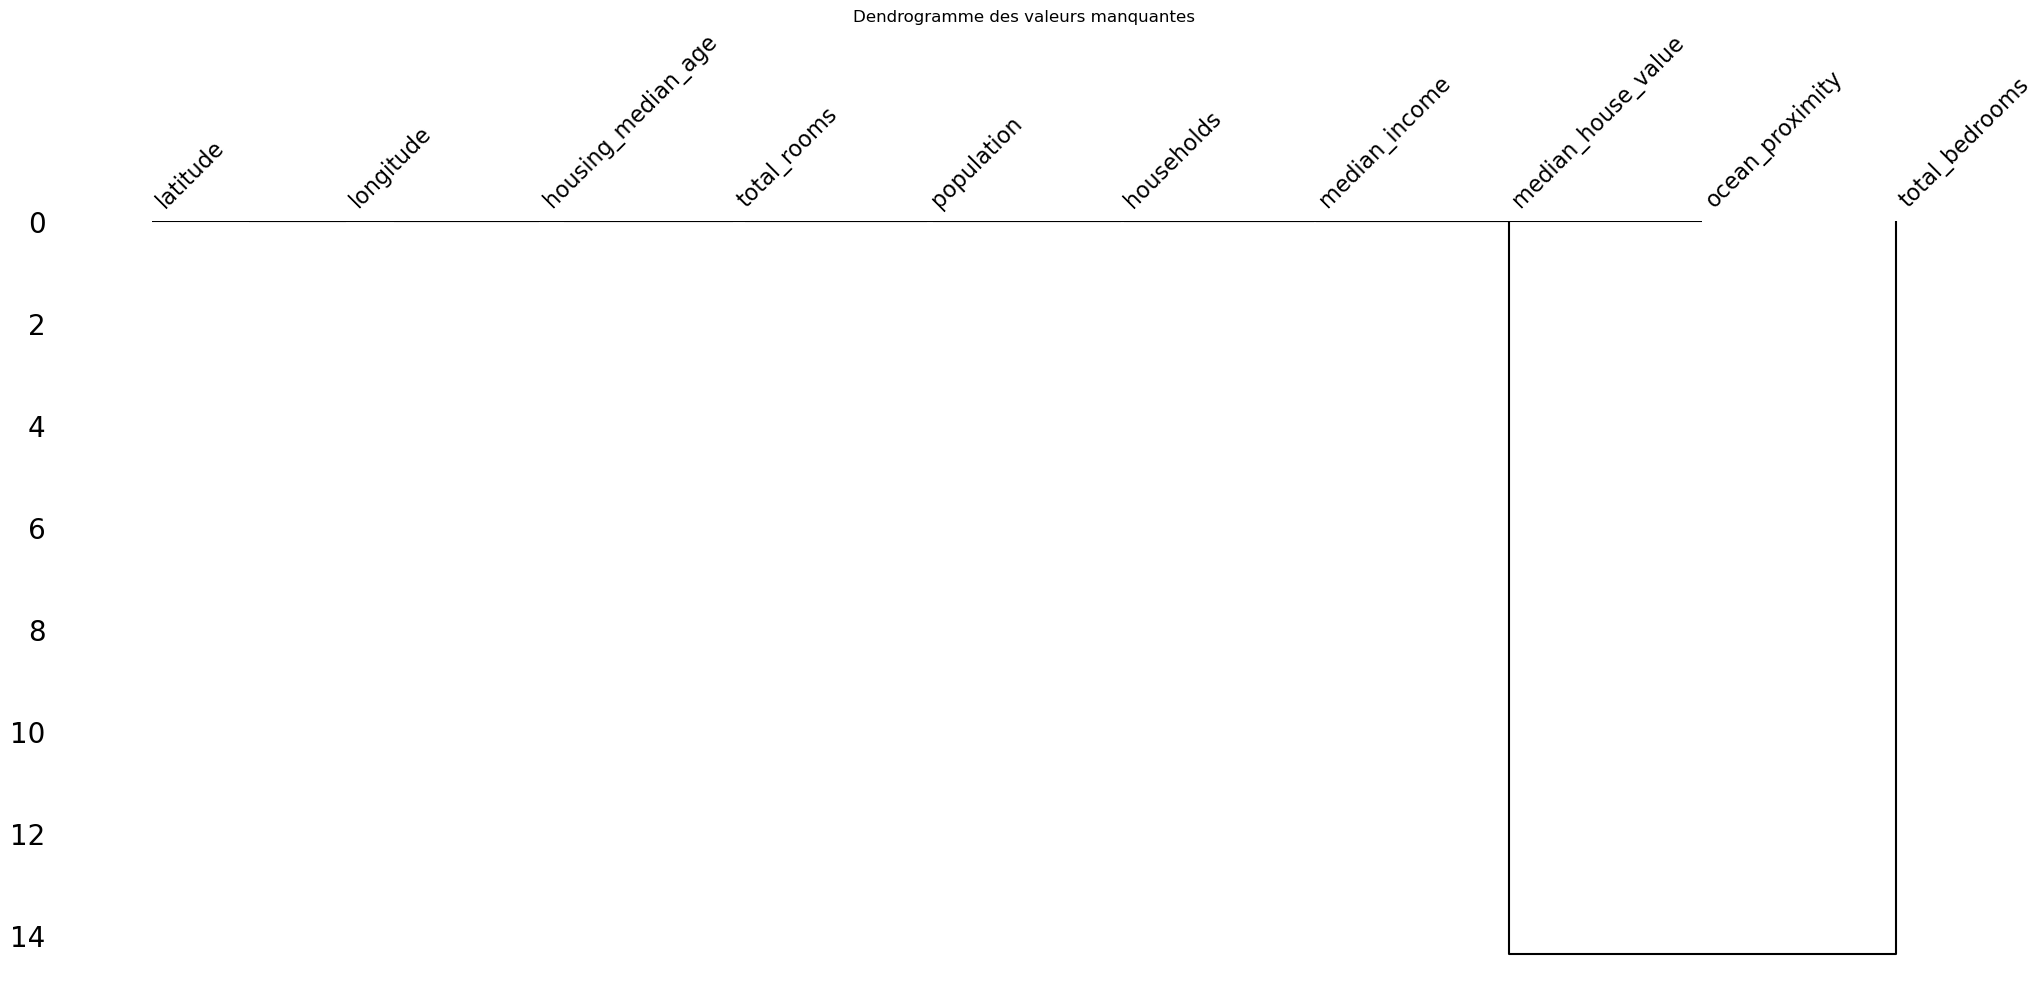

In [31]:
# 4. Dendrogramme des valeurs manquantes
msno.dendrogram(housing_df)
plt.title('Dendrogramme des valeurs manquantes')
plt.show()

### Distribution des données

In [33]:
# Boxplot du Label vs chaque variable categorielle 
# si le nombre de catégories n'excède 10, sinon des barplots
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [40]:
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].astype('category')

Text(0.5, 1.0, 'Boxplot de ocean_proximity vs ocean_proximity')

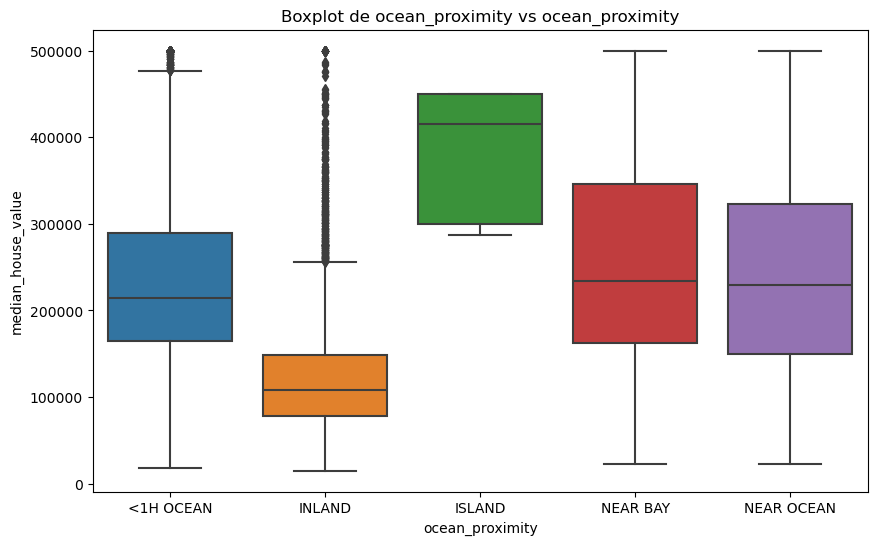

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_df)
plt.title(f'Boxplot de ocean_proximity vs ocean_proximity')

In [21]:
# subplots des distributions de toutes les variables numériques


### Matrice de correlations

### Résumé de la partie exploratoire - transformations pertinentes?

## Préparation des données

### Gestion des données manquantes

- Utilisez l'une des trois approches classiques de gestion de données manquantes (suppression, encodage, imputation) à ce jeu de données et justifier votre choix. Discuter égalment de l'impact de votre approche sur les performances du modèle de prédiction du pric médian que vous concevrez plutard.

In [22]:
# gestion des données manquantes
housing_train_clean_df = _

### Correction ou suppression de valeurs aberrantes

### Sélection de feature

In [23]:
# supprimez les variables ne fournissant pas d'informations utiles
# pour prédire le prix médian des maisons


### Feature engineering

- Discrétisez les variables continues
- Décomposez les features si nécessaire : catégorie, date/time,...
- Effectuez des transformations prometeuses : aggrégation, log(x), sqrt(x),...


### [Feature Scaling and/or Normalization](https://colab.research.google.com/github/ml-course/master/blob/master/notebooks/06%20-%20Data%20Preprocessing.ipynb)

- Réduiser à la même échelle entre 0 et 1 toutes les variables numériques

### Encoder les variables catégorielles

### Créer un pipeline 

- Créez un pipeline pour automatiser les transformations effectuer sur l'ensemble d'entraînement et éviter les fuites de données

- Séparez la donnée d'entraînement en ensemble d'entraînement et de validation

- Appliquer le pipeline créer dessus